Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = "/content/drive/MyDrive/flowers"
folders = os.listdir(data)
print(folders)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [12]:
image_names = []
labels = []
data_images = []

size = 28,28

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [13]:
label_dummies = pd.get_dummies(labels)
labels =  label_dummies.values.argmax(1)

In [19]:
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [20]:
print(f"Shape of images is :{data.shape}")
print(f"Shape of labels is :{labels.shape}")

Shape of images is :(4207, 28, 28, 3)
Shape of labels is :(4207,)


In [21]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [16]:
X_train[0]

array([[[0.30588236, 0.54509807, 0.49803922],
        [0.24313726, 0.5058824 , 0.40392157],
        [0.34509805, 0.5647059 , 0.49411765],
        ...,
        [0.30980393, 0.24705882, 0.17254902],
        [0.34901962, 0.31764707, 0.27058825],
        [0.41960785, 0.36078432, 0.33333334]],

       [[0.17254902, 0.44705883, 0.3254902 ],
        [0.18039216, 0.47843137, 0.36078432],
        [0.20784314, 0.47058824, 0.3882353 ],
        ...,
        [0.29411766, 0.23921569, 0.16862746],
        [0.2       , 0.16862746, 0.12941177],
        [0.45490196, 0.38431373, 0.3254902 ]],

       [[0.25882354, 0.5882353 , 0.4862745 ],
        [0.27058825, 0.56078434, 0.47058824],
        [0.10980392, 0.23921569, 0.17254902],
        ...,
        [0.30588236, 0.25882354, 0.19215687],
        [0.18431373, 0.16470589, 0.12941177],
        [0.41568628, 0.34901962, 0.28235295]],

       ...,

       [[0.19215687, 0.1882353 , 0.42745098],
        [0.1764706 , 0.19607843, 0.16470589],
        [0.21568628, 0

In [32]:
y_train[0]

4.0

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

network =Sequential()
network.add(Conv2D(8, (1,1),input_shape=(28, 28, 3),activation='relu'))
network.add(MaxPool2D(pool_size=(1,1)))
network.add(Conv2D(16, (1,1),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(10,activation="softmax"))

In [24]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [25]:
network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size = 1
epochs = 20
history=network.fit(X_train, y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/20
2524/2524 [==============================] - 11s 4ms/step - loss: 1.4151 - accuracy: 0.4018
Epoch 2/20
2524/2524 [==============================] - 10s 4ms/step - loss: 1.0238 - accuracy: 0.5953
Epoch 3/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.8896 - accuracy: 0.6508
Epoch 4/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.7812 - accuracy: 0.6956
Epoch 5/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.6972 - accuracy: 0.7273
Epoch 6/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.5829 - accuracy: 0.7810
Epoch 7/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.5147 - accuracy: 0.8087
Epoch 8/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.4279 - accuracy: 0.8475
Epoch 9/20
2524/2524 [==============================] - 10s 4ms/step - loss: 0.2953 - accuracy: 0.9053
Epoch 10/20
2524/2524 [==============================] - 10s 4ms/step - l

In [26]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

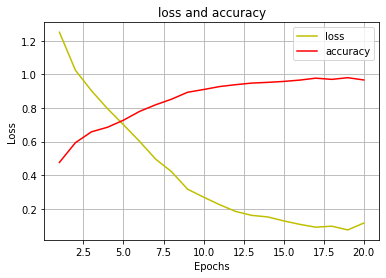

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'y', label='loss')
plt.plot(epochs, val_accuracy, 'r', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [28]:
network.evaluate(X_test,y_test)

53/53 [==============================] - 0s 5ms/step - loss: 2.5039 - accuracy: 0.5918


[2.503889322280884, 0.591800332069397]

In [29]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

2 ==> 2.0
1 ==> 1.0
3 ==> 4.0
3 ==> 3.0
0 ==> 3.0
1 ==> 1.0
1 ==> 3.0
1 ==> 1.0
0 ==> 3.0
0 ==> 4.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


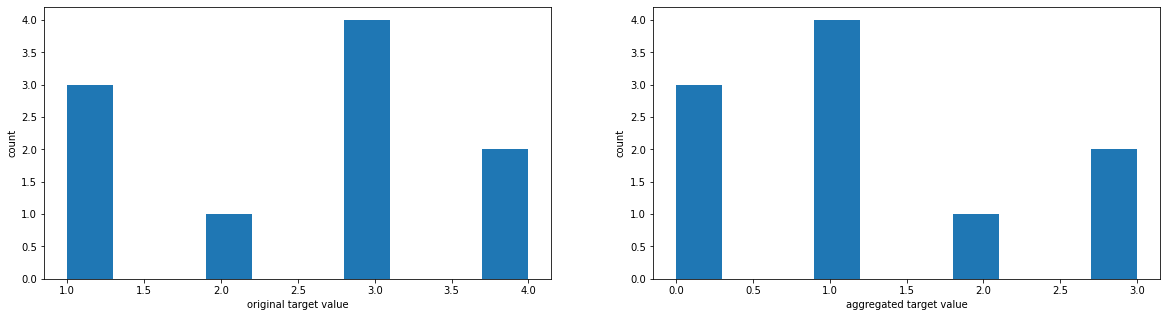

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()